## Praca z danymi przestrzennymi

Instalujemy pakiet do pracy z danymi przestrzennymi. 

```shell
mamba install gdal -c conda-forge
```

Czasem nazwa zainstalowanego pakietu nie pokrywa się z biblioteką, którą później importujemy. Tak jest w tym przypadku. Instalujemy [bibliotekę GDAL/OGR](https://gdal.org/), ale jest ona widoczna po instalacji jako [osgeo](https://www.osgeo.org/).

Interfejsy do tej biblioteki dla języka Python są dostępne pod adresem https://gdal.org/api/python.html.

In [3]:
from osgeo import gdal, ogr

gdal.__version__

'3.4.2'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Warstwy wektorowe

Pakiet z którego korzystamy potrafi czytac i zapisywać dane w popularnych formatach rastrowych i wektorowych. Dla potrzeb ćwiczeń wykorzystamy format GeoJSON dla danych wektorowych i GeoTIFF dla danych rastrowych.

Jako dane wektorowe zostały pobrane z serwera USGS trzęsienia ziemi z roku 2021 o magnitudzie przekraczającej 6.

In [5]:
driver = ogr.GetDriverByName("GeoJSON")
dane = driver.Open("dane/eq6-2021.geojson", 0)
layer = dane.GetLayer()

Ile elementów (w tym przypadku punktów) znajduje się na warstwie.

In [6]:
layer.GetFeatureCount()

157

Jaki mają zasięg przestrzenny.

In [7]:
layer.GetExtent()

(-179.793, 179.6324, -61.8098, 62.4492)

Jeśli chcemy sprawdzić jakie formaty wektorowe są obsługiwane przez wykorzystywaną wersję pakietu, możemy użyć kodu poniżej.

In [8]:
for i in range(ogr.GetDriverCount()):
    print(ogr.GetDriver(i).GetName())

ESRIC
FITS
PCIDSK
netCDF
PDS4
VICAR
JP2OpenJPEG
PDF
MBTiles
BAG
EEDA
OGCAPI
DB2ODBC
ESRI Shapefile
MapInfo File
UK .NTF
LVBAG
OGR_SDTS
S57
DGN
OGR_VRT
REC
Memory
CSV
NAS
GML
GPX
LIBKML
KML
GeoJSON
GeoJSONSeq
ESRIJSON
TopoJSON
OGR_GMT
GPKG
SQLite
ODBC
WAsP
PGeo
MSSQLSpatial
PostgreSQL
OpenFileGDB
DXF
CAD
FlatGeobuf
Geoconcept
GeoRSS
GPSTrackMaker
VFK
PGDUMP
OSM
GPSBabel
OGR_PDS
WFS
OAPIF
Geomedia
EDIGEO
SVG
CouchDB
Cloudant
Idrisi
ARCGEN
XLS
ODS
XLSX
Elasticsearch
Walk
Carto
AmigoCloud
SXF
Selafin
JML
PLSCENES
CSW
VDV
GMLAS
MVT
NGW
MapML
TIGER
AVCBin
AVCE00
HTTP


Dostęp do poszczególnych elementów warstwy uzyskujemy zwykle iterując po kolejnych punktach. Aby uzyskać ponownie dostęp do tych danych, należy po zakończeniu pętli (tutaj `while`) zresetować iterację - `ResetReading()`.

Zapiszmy współrzędne punktów z trzęsieniami ziemi w dwóch listach (x,y) do późniejszego wyświetlenia.

In [10]:
element = layer.GetNextFeature()
x = []
y = []
while element:
    g = element.GetGeometryRef()
    x.append(g.GetX())
    y.append(g.GetY())
    element = layer.GetNextFeature()
print(x)
layer.ResetReading()

[127.5773, -179.352, -107.0706, -124.298, 178.5777, 33.5085, -23.8375, 122.2274, 154.1393, 129.3846, 128.1359, -27.1401, -112.0255, 151.3524, 151.1847, 142.5026, -76.8126, 93.5061, 166.5074, 153.7074, 51.2613, 56.0716, 56.0743, 134.1805, 126.4474, -86.5255, 124.2812, 96.709, -25.2678, 121.8314, 179.604, 167.0396, 158.4642, 26.2152, -156.581, -155.527166666667, 174.5221, -27.5186, 67.2614, 174.8958, 135.4527, 25.2697, -179.0153, -87.8647, -73.9329, 152.4879, -67.0129, -99.753, -176.0683, -177.3798, 154.9113, -24.8743, -24.221, -26.3481, 167.0585, -25.4158, -23.3552, -73.4822, -157.6441, -27.2495, -26.4514, -26.7611, -26.4306, -25.2637, -25.0316, 126.7151, 94.0192, 133.958, -80.6156, -157.8876, 121.9083, -176.8643, 120.7259, -82.779, 146.7999, -82.6774, 126.4984, -119.4998333, -71.4818, -179.416, -177.8449, 126.2911, -148.2512, -177.3725, 98.2513, 100.0082, -109.3943, 96.6442, 141.8167, -82.4146, 66.3135, -90.2266, -177.5658, 144.2159, 141.5973, -176.3205, 92.4565, 145.5171, -177.1526, -

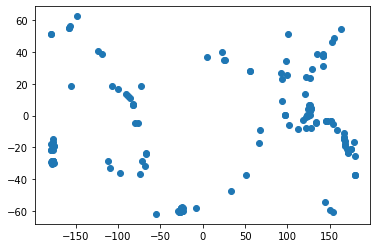

In [11]:
plt.scatter(x,y);

A jak można odczytać atrybuty związane w tym przypadku z trzęsieniami ziemi?  
Wyświetlamy dokumentację kolejnych typów danych.

In [12]:
dir(layer)

['AlterFieldDefn',
 'Clip',
 'CommitTransaction',
 'CreateFeature',
 'CreateField',
 'CreateFields',
 'CreateGeomField',
 'DeleteFeature',
 'DeleteField',
 'Dereference',
 'Erase',
 'FindFieldIndex',
 'GetDescription',
 'GetExtent',
 'GetFIDColumn',
 'GetFeature',
 'GetFeatureCount',
 'GetFeaturesRead',
 'GetGeomType',
 'GetGeometryColumn',
 'GetLayerDefn',
 'GetMetadata',
 'GetMetadataDomainList',
 'GetMetadataItem',
 'GetMetadata_Dict',
 'GetMetadata_List',
 'GetName',
 'GetNextFeature',
 'GetRefCount',
 'GetSpatialFilter',
 'GetSpatialRef',
 'GetStyleTable',
 'Identity',
 'Intersection',
 'Reference',
 'ReorderField',
 'ReorderFields',
 'ResetReading',
 'RollbackTransaction',
 'SetAttributeFilter',
 'SetDescription',
 'SetFeature',
 'SetIgnoredFields',
 'SetMetadata',
 'SetMetadataItem',
 'SetNextByIndex',
 'SetSpatialFilter',
 'SetSpatialFilterRect',
 'SetStyleTable',
 'StartTransaction',
 'SymDifference',
 'SyncToDisk',
 'TestCapability',
 'Union',
 'Update',
 '__bool__',
 '__clas

In [13]:
layer_df = layer.GetLayerDefn()
dir(layer_df)

['AddFieldDefn',
 'AddGeomFieldDefn',
 'DeleteGeomFieldDefn',
 'Destroy',
 'GetFieldCount',
 'GetFieldDefn',
 'GetFieldIndex',
 'GetGeomFieldCount',
 'GetGeomFieldDefn',
 'GetGeomFieldIndex',
 'GetGeomType',
 'GetName',
 'GetReferenceCount',
 'IsGeometryIgnored',
 'IsSame',
 'IsStyleIgnored',
 'SetGeomType',
 'SetGeometryIgnored',
 'SetStyleIgnored',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__swig_getmethods__',
 '__swig_setmethods__',
 '__weakref__',
 'this']

Ile ta warstwa ma atrybutów?

In [14]:
layer_df.GetFieldCount()

27

Jakie to są atrybuty?

In [15]:
for i in range(layer_df.GetFieldCount()):
    print(layer_df.GetFieldDefn(i).name)

id
mag
place
time
updated
tz
url
detail
felt
cdi
mmi
alert
status
tsunami
sig
net
code
ids
sources
types
nst
dmin
rms
gap
magType
type
title


Wyświetlmy zawartość atrybutu `mag` - magnitudy i zapamiętajmy go w liście o tej samej nazwie.

In [16]:
element = layer.GetNextFeature()
mag = []
while element:
    mag.append(element.GetField('mag'))
    element = layer.GetNextFeature()
print(mag)
layer.ResetReading()

[7.3, 6.1, 6.0, 6.2, 6.2, 6.0, 6.0, 7.3, 6.6, 6.0, 6.0, 6.0, 6.1, 6.1, 6.3, 6.3, 7.5, 6.2, 6.1, 6.2, 6.0, 6.4, 6.0, 6.0, 6.6, 6.3, 6.0, 6.0, 6.0, 6.2, 6.1, 6.2, 6.4, 6.4, 6.9, 6.21, 6.9, 6.2, 6.0, 7.3, 6.1, 6.0, 6.1, 6.5, 6.4, 6.1, 6.2, 7.0, 6.0, 6.4, 6.0, 7.1, 6.6, 6.0, 6.9, 6.1, 6.9, 7.2, 6.9, 6.1, 6.0, 6.1, 6.7, 8.1, 7.5, 7.1, 6.1, 6.0, 6.2, 8.2, 6.3, 6.1, 6.7, 6.7, 6.0, 6.1, 6.1, 6.0, 6.0, 6.1, 6.5, 6.2, 6.1, 6.5, 7.3, 6.1, 6.7, 6.7, 6.0, 6.1, 6.7, 6.0, 6.1, 6.1, 6.9, 6.1, 6.0, 6.1, 6.5, 6.5, 6.1, 6.0, 6.1, 6.0, 6.1, 6.1, 6.6, 6.0, 6.4, 7.0, 6.0, 6.0, 6.6, 6.0, 6.1, 6.2, 6.2, 6.1, 6.3, 6.2, 6.0, 6.3, 6.5, 6.1, 8.1, 7.4, 6.1, 7.3, 6.3, 6.1, 6.2, 6.1, 6.2, 7.1, 6.0, 6.3, 6.1, 6.1, 7.7, 6.1, 6.3, 6.1, 6.3, 6.0, 6.7, 6.9, 7.0, 6.4, 6.2, 6.7, 6.1, 6.1, 6.1, 6.3, 6.1, 6.2, 6.1]


Jak wygląda rozkład częstości poszczególnych magnitud?

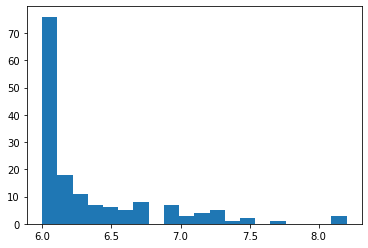

In [17]:
plt.hist(mag, bins=20);

### Warstwy rastrowe

Do pracy z warstwami rastrowymi wykorzystamy dane w formacie GeoTIFF udostępnione na stronie http://quantum-gis.pl/podrecznik. Będą to dane wulkanu Etna oraz zobrazowania satelitarne okolic Krakowa:

* etna.tif - jednokanałowy numeryczny model terenu
* etna-color.tif - zobrazowanie barwne (3 kanały) tego samego terenu, również prezentujące topografię
* landsat8 - zobrazowanie satelitarne Landsat 8 z roku 2016 (kilka kanałów w oddzielnych plikach)

Po pobraniu danych w formacie `zip`, należy je rozpakować.

Do wczytanie danych wykorzystamy taką samą funkcję (`Open`), ale tym razem pracować będziemy z modułem `gdal`.

In [19]:
etna = gdal.Open("dane/Etna.tif")
etna_k = gdal.Open("dane/Etna-color.tif")

#### Metadane rastra

Ile kanałów ma raster jednej i drugiej warstwy rastrowej?

In [20]:
print(etna.RasterCount)
print(etna_k.RasterCount)

1
3


In [21]:
etna.GetProjection()

'PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]'

In [22]:
etna_wsp = etna.GetGeoTransform()
etna_wsp

(4745125.0, 25.0, 0.0, 1665050.0, 0.0, -25.0)

Współrzędne krawędzi rastra w przyjętym układzie współrzędnych.

In [23]:
etna_wsp[0], etna_wsp[3]

(4745125.0, 1665050.0)

Rozdzielczość rastra (wymiary komórki rastra).

In [24]:
etna_wsp[1], etna_wsp[5]

(25.0, -25.0)

Liczba kolumn i wierszy rastra.

In [25]:
kolumn = etna.RasterXSize
wierszy = etna.RasterYSize
kolumn, wierszy

(1854, 1446)

#### Wydobycie danych z rastra

In [28]:
kanal = etna.GetRasterBand(1)
etna_dane = kanal.ReadAsArray(0, 0, kolumn, wierszy)
etna_dane

array([[1629.1881 , 1626.4026 , 1624.2601 , ...,  251.16405,  249.75653,
         249.83676],
       [1625.8534 , 1622.5693 , 1620.4456 , ...,  255.4561 ,  255.79073,
         257.50983],
       [1622.116  , 1618.8768 , 1616.2501 , ...,  261.5702 ,  263.64798,
         267.09473],
       ...,
       [ 372.02686,  371.89053,  371.27777, ...,    0.     ,    0.     ,
           0.     ],
       [ 375.27225,  374.61185,  373.10596, ...,    0.     ,    0.     ,
           0.     ],
       [ 378.20828,  377.58783,  374.63577, ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [29]:
etna_dane[0, 0]

1629.1881

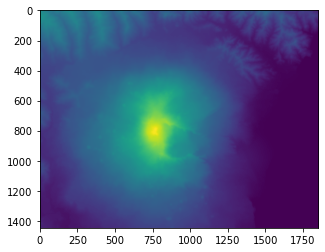

In [30]:
plt.imshow(etna_dane);

Wyświetlmy fragment z północno-wschodniej części tej warstwy używając lepszej palety barw.

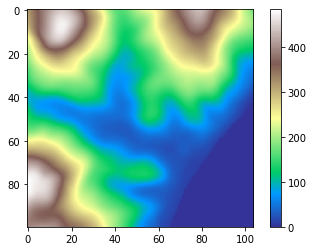

In [31]:
plt.imshow(etna_dane[100:200, 1750:], cmap='terrain')
plt.colorbar();

Zobaczmy jak dane z tej mapy wyglądają na histogramie.

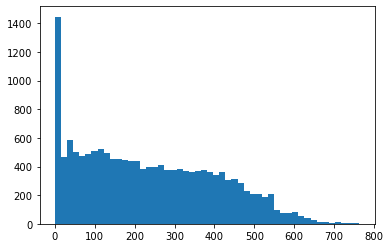

In [33]:
etna1 = etna_dane[100:200, 1700:]
plt.hist(etna1.flatten(), bins=50);

Czy wiesz jak interpretować wysoki pierwszy słupek po lewej stronie?

A jak wygląda drugi plik rastrowy, w którym mamy trzy kanały?  
Dla ułatwienia, od razu wyświetlimy poszczególne kanały (czerwony, zielony i niebieski) w odpowiadających im paletach barw.  
W taki sam sposób są kodowane informacje na zdjęciach cyfrowych oraz skanach.

Kanał 1

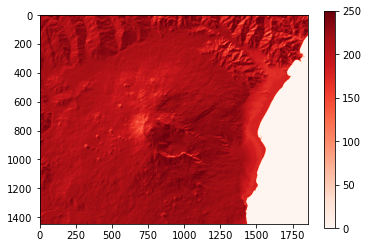

In [87]:
plt.imshow(etna_k.GetRasterBand(1).ReadAsArray(0, 0, kolumn, wierszy), cmap='Reds');
plt.colorbar();

Kanał 2

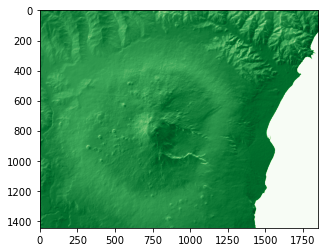

In [155]:
plt.imshow(etna_k.GetRasterBand(2).ReadAsArray(0, 0, kolumn, wierszy), cmap='Greens');

Kanał 3 wyświetlimy dla odmiany w odcieniach szarości.

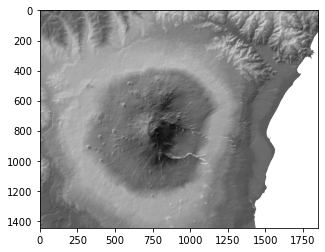

In [161]:
plt.imshow(etna_k.GetRasterBand(3).ReadAsArray(0, 0, kolumn, wierszy), cmap='Greys');

A jak wygląda histogram tej warstwy?  
Mamy w niej trzy kanały, więc będą trzy histogramy.

Wykorzystamy pomocniczą strukturę słownik (*dictionary*) o nazwie `kanaly`, w której przypiszemy jakim kolorem chcemy wyświetlać dany kanał. W słownikach, do ich elementów odwołujemy się używając kluczy (tutaj będą to numery kanałów). Zwracana jest zawartość danego elementu, tutaj kolor.

Parametr `alpha` określa poziom przezroczystości. Przetestuj różne wartości alpha i przypisania barw do kanałów.

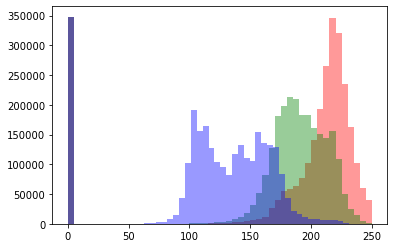

In [46]:
kanaly = {1: 'Red',
         2: 'Green',
         3: 'Blue'}

for klucz, wartosc in kanaly.items():
    plt.hist(etna_k.GetRasterBand(klucz).ReadAsArray(0, 0, kolumn, wierszy).flatten(), 
             color=wartosc, bins=50, alpha=.4);

Zaobserwuj w jakim przedziale mamy dane na tej mapie rastrowej.  

Histogram kanału czerwonego jest przesunięty najbardziej ku stronie prawej (wysokie wartości). Z tego właśnie powodu ta barwa jest dominująca, jeśli wyświetlisz `Etna-color.tif`.

Słowniki są strukturami nieuporządkowanymi. Nie odwołujemy się do pozycji w strukturze (indeksu), tylko do klucza. Nasz przykład jest nieco mylący, bo możemy odwołać się do elementu np. 2.

In [49]:
kanaly[2]

'Green'

Ale to tylko pozory. Dodajmy nowy element do słownika. Tym razem kluczem będzie tekst, a wartością liczba.

In [50]:
kanaly['dopisane'] = 22
kanaly

{1: 'Red', 2: 'Green', 3: 'Blue', 'dopisane': 22}

Do ostatniego elementu nie możemy się odwołać tak:

In [51]:
kanaly[4]

KeyError: 4

Ale możemy tak:

In [52]:
kanaly['dopisane']

22

#### Przykładowe przetwarzanie danych przestrzennych

Wygenerujemy warstwice (wektor w formacie GeoJSON) z numerycznego modelu terenu (raster w formacie GeoTIFF).

In [53]:
# https://stackoverflow.com/questions/22100453/gdal-python-creating-contourlines

ogr_ds = ogr.GetDriverByName("GeoJSON").CreateDataSource('dane/warstwice.geojson')
contour = ogr_ds.CreateLayer('warstwice')

field_defn = ogr.FieldDefn("ID", ogr.OFTInteger)
contour.CreateField(field_defn)
field_defn = ogr.FieldDefn("wysokosc", ogr.OFTReal)
contour.CreateField(field_defn)
    
gdal.ContourGenerate(kanal, 1000, 0, [], 0, 0, contour, 0, 1)
ogr_ds = None
del ogr_ds

### Zobrazowania satelitarne

To obecnie największe źródło danych przestrzennych. Dane tego typu udostępniane są w różnych formatach, m.in. jako GoeTIFF. Po rozpakowaniu przykładowych danych z satelity Landsat 8 uzyskujemy dostęp do danych w kilku kanałach spektralnych. Ze względu na znaczne objętości scen satelitarnych, obraz na którym pracujemy, to jedynie wycinek jednej sceny.

W sposób analogiczny jak poprzednio możemy zwizualizować dane z dowolnego kanału. 

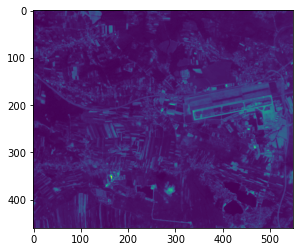

In [86]:
landsat = gdal.Open("dane/Landsat8/PAN_LC81880252016148LGN00_B4.TIF")
plt.imshow(landsat.GetRasterBand(1).ReadAsArray(0, 0, landsat.RasterXSize, landsat.RasterYSize));


#### Więcej informacji

* [API do GDAL/OGR](https://gdal.org/api/index.html#python-api)
* [pakiet osgeo](https://gdal.org/python/osgeo-module.html)
* [kurs geoinformatyki](http://jarekj.home.amu.edu.pl/?page_id=36)